## TDA@YSDA

### Homework 2

### Задача 1: спектры Лапласианов (3 балла)

В этой задаче требуется найти спектры Лапласианов Ходжа графа.

Для этого предлагается самостоятельно реализовать наивный алгоритм нахождения операторов ко-границ.

Для проверки будет генерироваться случайный граф (из модели Эрдеша-Реньи – то есть, наличие любого ребра в графе – это бернуллиевская случайная величина с вероятностью успеха $p$, не зависящая от других ребер).

Гарантируется, что **граф связный**

Граф будет подаваться на вход вашей функции в виде **списка ребер**.

Edges list: [(0, 2), (0, 3), (0, 4), (1, 3), (1, 5), (1, 6), (2, 4), (2, 5), (3, 5), (4, 6)]


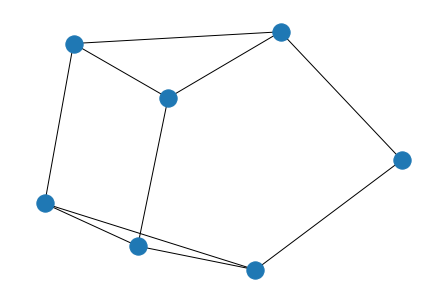

In [1]:
import networkx as nx

g = nx.gnp_random_graph(n = 7, p = 0.4, seed = 42)

nx.draw(g)

print('Edges list:', g.edges())

#### Шаг 1: найти клики

Напишите функцию `find_cliques()`, которая по данному на вход списку ребер в таком формате:

`edges = [(0, 1), (0, 2), (1, 2), (0, 3)]`

– для графа на N вершинах это список упорядоченных неповторяющихся пар вершин (вершины просто занумерованы числами от 0 до N-1), образующих ребро –

**найдет** все клики (полные подграфы) в данном графе,

и вернет список списков упорядоченных кортежей вершин, образующих клики:

`simplices = [[(0,), (1,), (2,), (3,)], 
              [(0, 1), (0, 2), (1, 2), (0, 3)],
              [(0, 1, 2)]]`
              
Это можно сделать и средствами стандартной библиотеки Python, но вообще можете использовать любые библиотеки.

In [ ]:
# your code here

#### Шаг 2: построить операторы ко-границ

Зная весь кликовый комплекс графа, можно построить операторы ко-границ.

В нашем случае это просто транспонированные (сопряженные) операторы границ, так что можно строить операторы, с которыми вы уже знакомы из первой половины курса.

В нашем примере мы имеем:

`simplices = [[(0,), (1,), (2,), (3,)], 
              [(0, 1), (0, 2), (1, 2), (0, 3)],
              [(0, 1, 2)]]`

4 0-симплекса (вершины), 4 1-симплекса (ребра), 1 2-симплекс (треугольник).

Внутри своего списка все k-симплексы занумерованы. Тогда, например, оператор границы $\partial_2$:

$\partial_2 ((0,1,2)) = (\hat{0},1,2) - (0,\hat{1},2) + (0,1,\hat{2}) = (1,2) - (0,2) + (0,1)$

имеет вид

$\partial_2 = 
\begin{matrix}(0,1) \\ (0,2) \\ (1,2) \\ (0,3)\end{matrix}
\overset{(0,1,2)}{\begin{pmatrix} 1 \\ -1 \\ 1 \\ 0\end{pmatrix}}.$

Так можно построить матрицы операторов границы:

1. инициализируем ее как матрицу из нулей размера (# (k-1)-симплексов)x(# k-симплексов)
2. для каждого k-симплекса (в списке k-симплексов) проходимся по списку всех (k-1)-симплексов, проверяем, являются ли они подмножеством данного k-симплекса, и если да – то исключением какого его элемента они даются, четного или нечетного – в зависимости от этого ставим +1 или -1 в матрицу на соответствующем месте

Соответствующий оператор ко-границы $\delta_2 : L^2_\wedge(K_2)\to L^2_\wedge(K_{3})$
$= \partial^T_2$ – это просто транспонированный $\partial_2$.

k-й лапласиан Ходжа – это:

$$\Delta^{~}_k = \delta^{~}_{k-1}\delta^T_{k-1} + \delta^T_{k}\delta^{~}_{k}$$

In [ ]:
# your code here

#### Шаг 3: найдите спектры Лапласианов

Лапласианы – это эрмитовы матрицы, потому для нахождения их собственных чисал можно пользоваться, например, `numpy.linalg.eigh`.

**Ответом** на задачу является матрица из собственных значений всех ненулевых Лапласианов Ходжа данного на вход графа. 

$$A = \begin{pmatrix}\lambda^{(0)}_\min & ... \\
\lambda^{(1)}_\min & ... \\ 
... & ...\\
\lambda^{(m)}_\min & ...
\end{pmatrix}$$

Т.е. k-ая строчка матрицы = спектр k-ого Лапласиана, записанный **в порядке возрастания собственных чисел** (они не могут быть неотрицательными, потому первые несколько из них с численной точностью равны нулю, остальные – положительны). 

Размерность k-ого Лапласиана – это (# k-симплексов)x(# k-симплексов) – потому число столбцов матрицы = максимальная из размерностей Лапласианов, к спектрам меньших размерностей **дописываем справа нули**.

Так, у графа в нашем примере это 

$$
\begin{pmatrix}\lambda^{(0)}_{0=\min} & \lambda^{(0)}_1 & \lambda^{(0)}_2 & \lambda^{(0)}_{4=\max} \\
\lambda^{(1)}_{0=\min} & \lambda^{(1)}_1 & \lambda^{(1)}_2 & \lambda^{(1)}_{4=\max} \\ 
\lambda^{(2)}_{0} & 0 & 0 & 0\\
\end{pmatrix}
$$

Матричные элементы давайте **округлять до 3 знаков после запятой** – это можно сделать `numpy.round(A, 3)`.

In [ ]:
# your code here